In [3]:
import os
import librosa
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

train_audio_path = '../data/'
labels=["yes", "no", "up", "down", "left"]

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

In [5]:
import numpy as np

le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [23]:
model = load_model('best_model_20.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

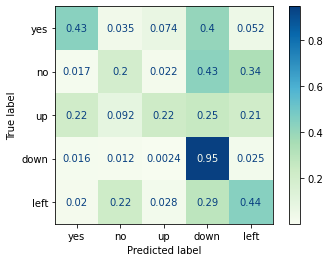

              precision    recall  f1-score   support

           0       0.62      0.43      0.51      1722
           1       0.36      0.20      0.25      1732
           2       0.63      0.22      0.33      1678
           3       0.40      0.95      0.56      1650
           4       0.41      0.44      0.43      1726

    accuracy                           0.44      8508
   macro avg       0.48      0.45      0.42      8508
weighted avg       0.48      0.44      0.42      8508



In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)